# LENET - 5 CNN Model - Yaun Lecun


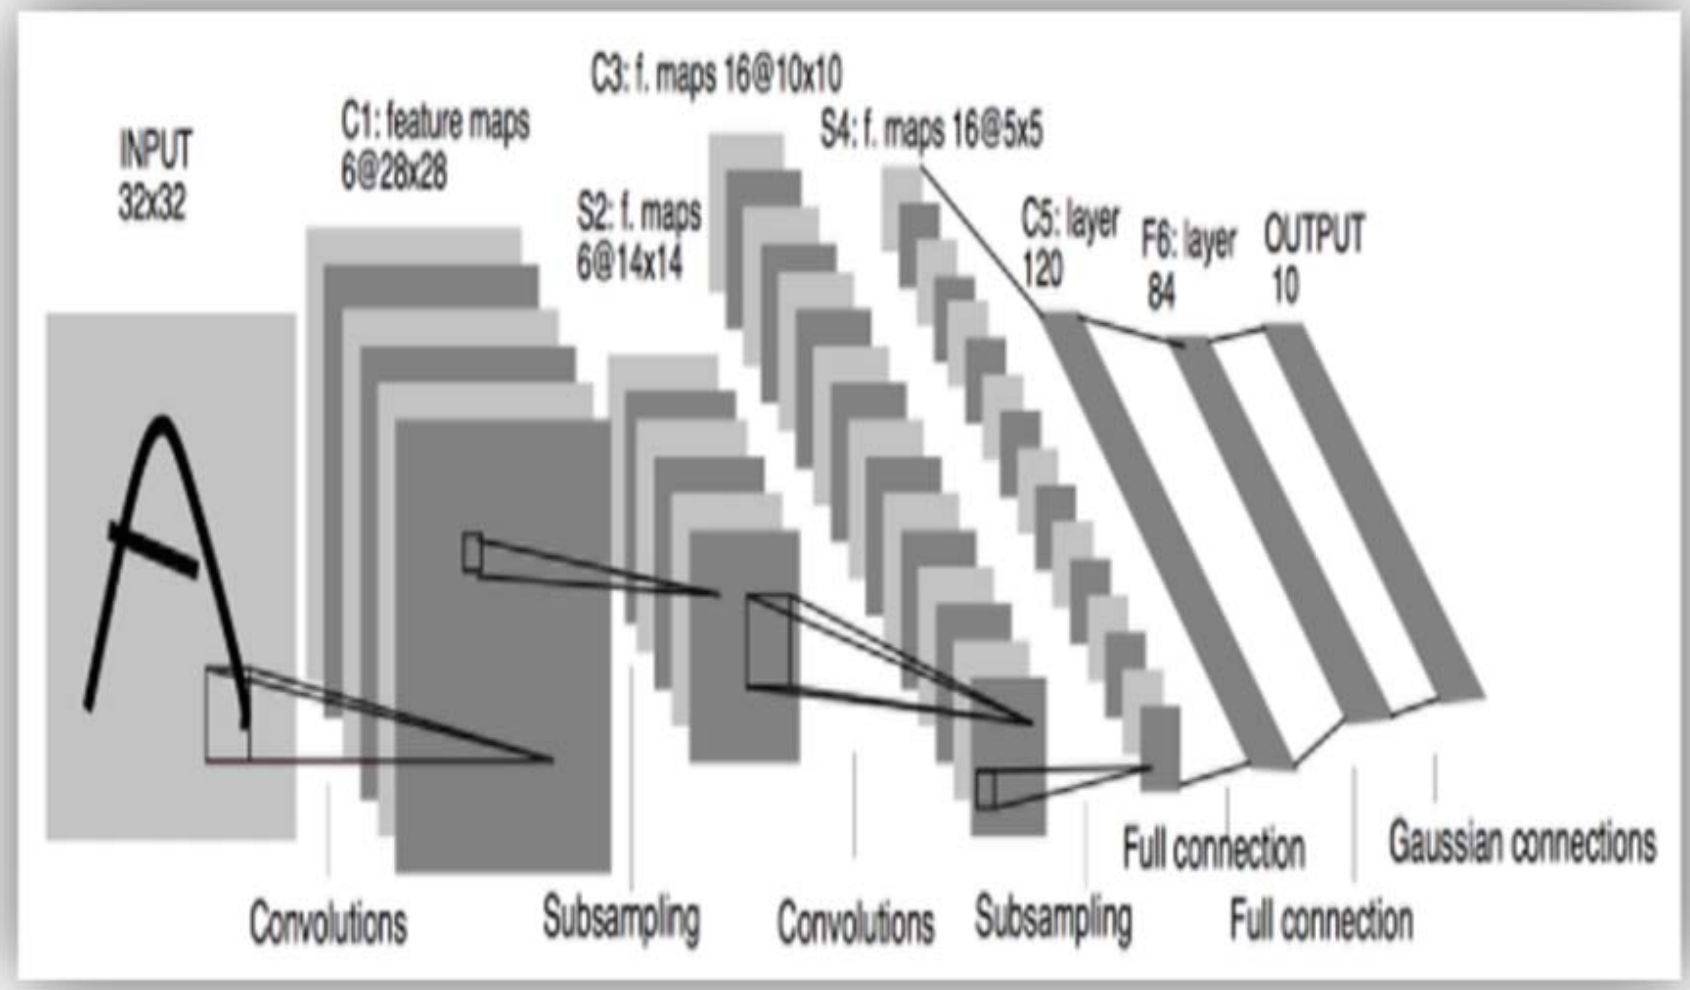

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [2]:
(256*120+120)+(120*84+84)+(84*10+10)

41854

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

x_train /=255
x_test /=255

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

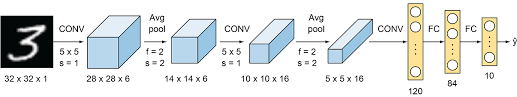

In [13]:
model = Sequential()
# conv layer 1
model.add(Conv2D(6, kernel_size=(5,5), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
# conv layer 2
model.add(Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(120, activation='relu'))

# 2nd Fully connected layer
model.add(Dense(84, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [10]:
model.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=5,batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 10s 6ms/step - loss: 0.2499 - accuracy: 0.9247 - val_loss: 0.0865 - val_accuracy: 0.9739
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0820 - accuracy: 0.9740 - val_loss: 0.0576 - val_accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0582 - accuracy: 0.9813 - val_loss: 0.0463 - val_accuracy: 0.9838
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0382 - val_accuracy: 0.9866
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0416 - val_accuracy: 0.9864


In [ ]:
# Task : (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()